Understanding auto encoder on mnist digit dataset

In [14]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Data Exploration and visualization

In [15]:
#load our mnist dataset
(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

print('XTrain class = ', type(XTrain))
print('YTrain class = ', type(YTrain))

#shape of our dataset
print('XTrain shape = ', XTrain.shape)
print('XTrain shape = ', XTest.shape)
print('YTrain shape = ', YTrain.shape)
print('YTest shape = ', YTest.shape)

#number of distinct values of our mnist target
print('YTrain values = ', np.unique(YTrain))
print('YTest values = ', np.unique(YTest))

#distribution of classes in our dataset
unique, counts = np.unique(YTrain, return_counts=True)
print('YTrain distribution = ', dict(zip(unique, counts)))
unique, counts = np.unique(YTest, return_counts=True)
print('YTest distribution = ', dict(zip(unique, counts)))

XTrain class =  <class 'numpy.ndarray'>
YTrain class =  <class 'numpy.ndarray'>
XTrain shape =  (60000, 28, 28)
XTrain shape =  (10000, 28, 28)
YTrain shape =  (60000,)
YTest shape =  (10000,)
YTrain values =  [0 1 2 3 4 5 6 7 8 9]
YTest values =  [0 1 2 3 4 5 6 7 8 9]
YTrain distribution =  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
YTest distribution =  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


Now lets visualize the destribution of our data by classes

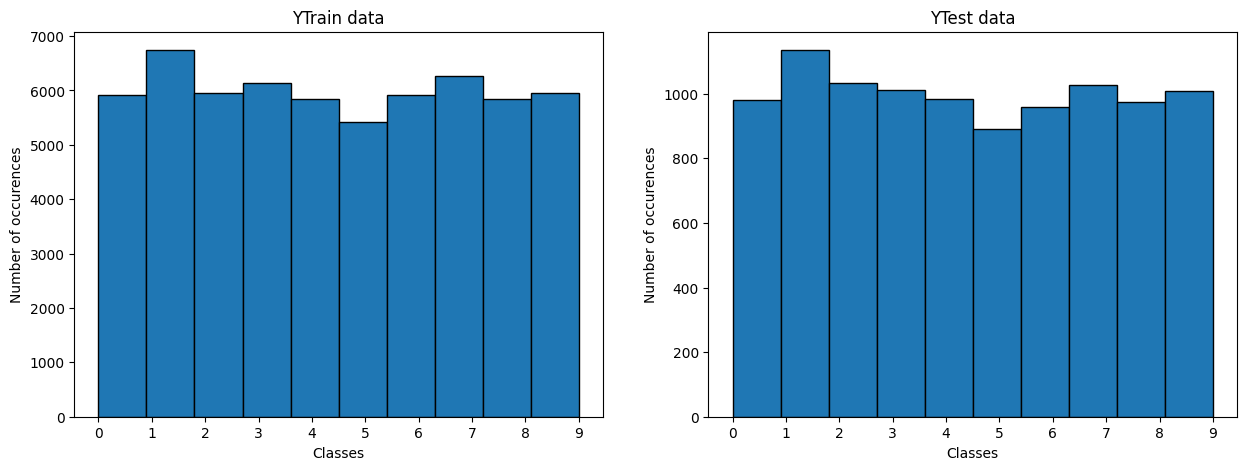

In [17]:
#we plot an histogram distribution of our test and train data
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(YTrain, ec = 'black')
axs[0].set_title('YTrain data')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Number of occurences')
axs[1].hist(YTest, ec = 'black')
axs[1].set_title('YTest data')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Number of occurences')
#we want to show all ticks...
axs[0].set_xticks(np.arange(10))
axs[1].set_xticks(np.arange(10))
plt.show()

Data preprocessing

In [18]:
from re import X
#data normalization
XTrain = XTrain.astype('float32')/255
XTest = XTest.astype('float32')/25

#data reshaping
XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
XTest = XTest.reshape((len(XTest), np.prod(XTest.shape[1:])))

print(XTrain.shape)
print(XTest.shape)

(60000, 784)
(10000, 784)


Building of our auto encoder

In [19]:
InputModel = Input(shape=(784,))
EncodedLayer = Dense(32, activation='relu')(InputModel)
DecodedLayer = Dense(784, activation='sigmoid')(EncodedLayer)
AutoencoderModel = Model(InputModel, DecodedLayer)
#we can sumarize our model
AutoencoderModel.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

Model training and predict

In [21]:
#lets train the model using adadelta optimizer
#autoencodermodel.compile(optimizer = 'adadelta', loss = 'binary_crossentropy) or
AutoencoderModel.compile(optimizer = 'adam', loss = 'binary_crossentropy')
history = AutoencoderModel.fit(XTrain, XTrain, epochs = 100, batch_size = 256, shuffle = True, validation_data = (XTest, XTest))
#make prediction to decode the digits
DecodedDigits = AutoencoderModel.predict(XTest)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3778 - val_loss: -3.6935
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1781 - val_loss: -11.6338
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1485 - val_loss: -16.4720
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1321 - val_loss: -22.1495
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1207 - val_loss: -27.5220
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1126 - val_loss: -34.2252
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1072 - val_loss: -41.5308
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1033 - val_loss: -48.5300
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1004 - val_loss: -55.7542
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0980 - val_loss: -62.4167
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0961 - val_loss: -68.2889
Epoch 12/100
235

Model evaluation

dict_keys(['loss', 'val_loss'])


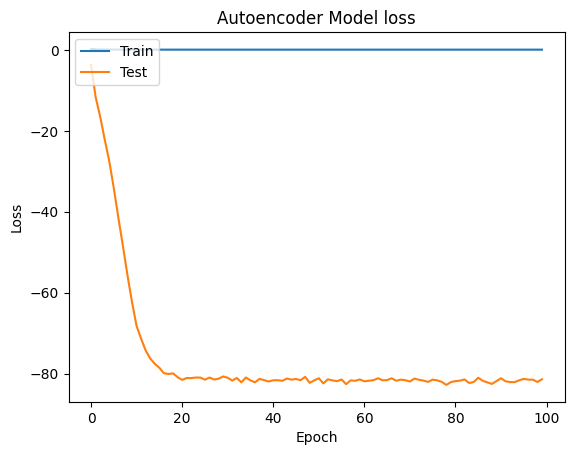

In [22]:
def plotmodelhistory(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Autoencoder Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 'upper left')
    plt.show()

#list all data in history
print(history.history.keys())
#visualization of the loss minimization during the training process
plotmodelhistory(history)

Visualization of the results

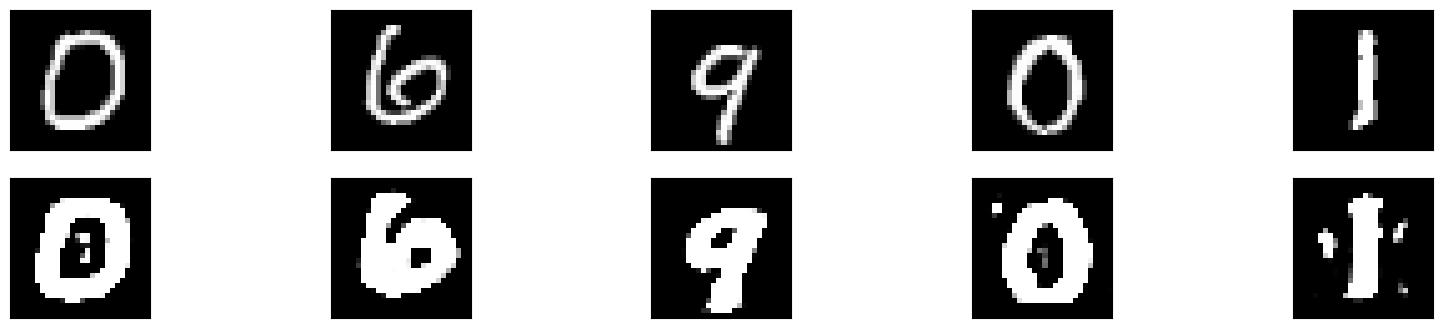

In [25]:
n = 5
plt.figure(figsize = (20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    #input image
    plt.imshow(XTest[i+10].reshape(28, 28))
    plt.gray
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i+1+n)
    #image decoded by our auto encoder
    plt.imshow(DecodedDigits[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()